In [2]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [14]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

In [16]:
len(training_data)

60000

In [18]:
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [20]:
len(test_data)

10000

In [26]:
image, label = training_data[0]

In [28]:
image.shape # (1) indicates grey scale

torch.Size([1, 28, 28])

In [32]:
image.squeeze().shape

torch.Size([28, 28])

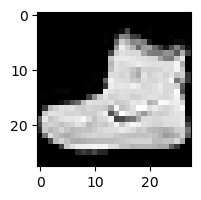

In [38]:
plt.figure(figsize=(2,2))
plt.imshow(image.squeeze(), cmap='grey')
plt.show()

In [40]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

labels_map[label]

'Ankle Boot'

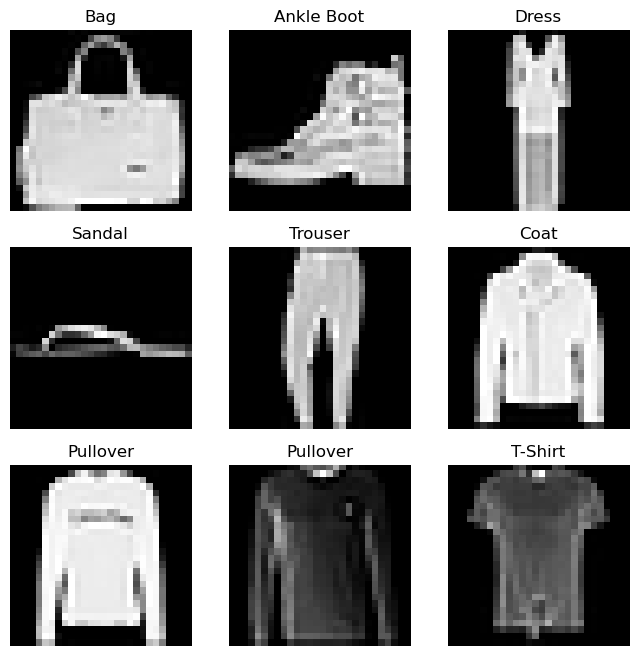

In [42]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## DataLoaders

In [45]:
from torch.utils.data import DataLoader

In [47]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [73]:
for images, labels in train_dataloader:
    print(images.size())
    break

torch.Size([64, 1, 28, 28])


In [61]:
data_iter = iter(train_dataloader)
images, labels = next(data_iter)

In [75]:
images.squeeze().size()

torch.Size([64, 28, 28])

In [77]:
img = images[5].squeeze()
label = labels[5]

In [81]:
label.item()

1

In [85]:
labels_map[label.item()]

'Trouser'

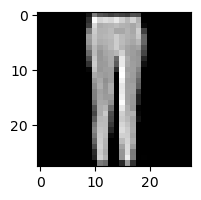

In [87]:
plt.figure(figsize=(2,2))
plt.imshow(img.squeeze(), cmap='grey')
plt.show()